In [14]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

# Load data and checking shape , info and describe

In [26]:
# Load Trian and Test Data
house_price = pd.read_csv("train.csv") 
house_id= house_price.Id
house_test = pd.read_csv("test.csv")
house_test_id = house_test.Id

# Drop house ID inplace
house_price.drop("Id",1,inplace=True)
house_test.drop("Id",1,inplace=True)

# check the dimension of the dataframe
print(house_price.shape)
print(house_test.shape)

# A glance at the dataframe
house_price.head()

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Checking count of features with different data types and splitting them into different dataframe for futher analysis

In [17]:
# Check the number of columns of specific data type
print(house_price.dtypes.value_counts())

object     43
int64      34
float64     3
dtype: int64


In [18]:
# Make a new dataframe containing only numeric data columns

numeric_feature = [a for a in range(len(house_price.dtypes)) if house_price.dtypes[a] in ['int64','float64']]
numeric_fet_test = [a for a in range(len(house_test.dtypes)) if house_test.dtypes[a] in ['int64','float64']]
numeric_data = house_price.iloc[:,numeric_feature]
numeric_test = house_test.iloc[:,numeric_fet_test]

# Violin plots to check density and distribution of data

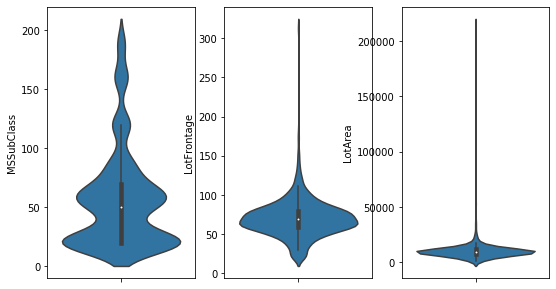

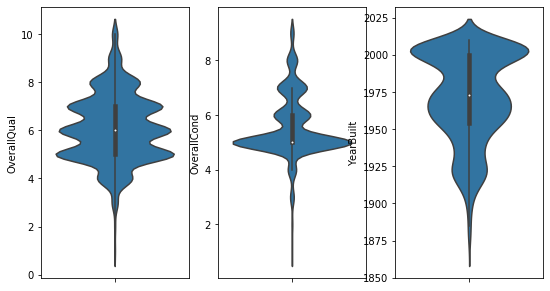

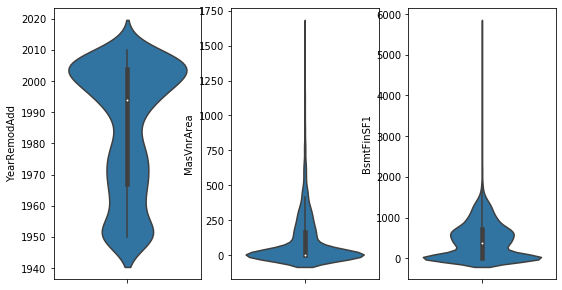

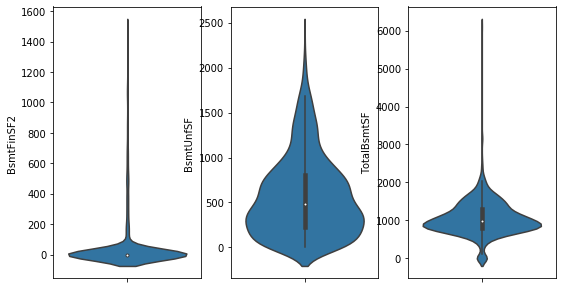

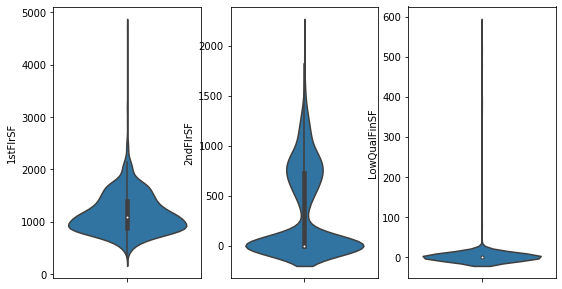

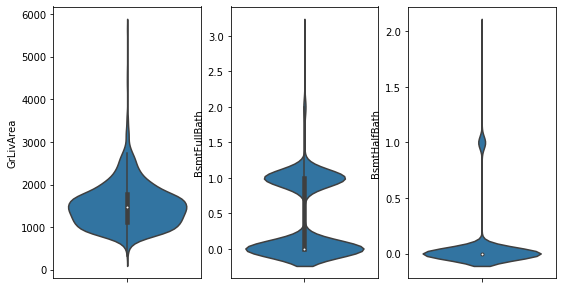

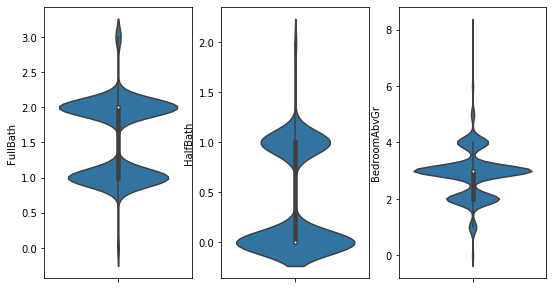

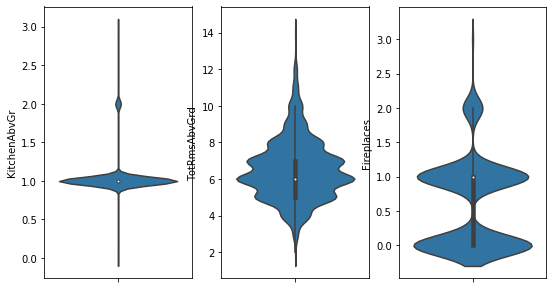

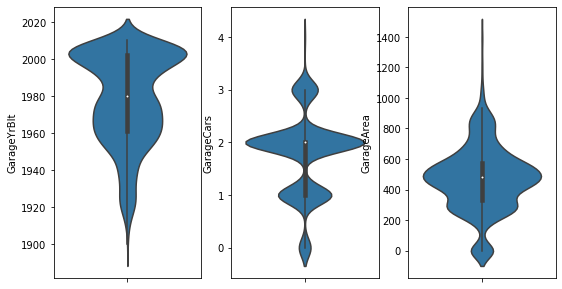

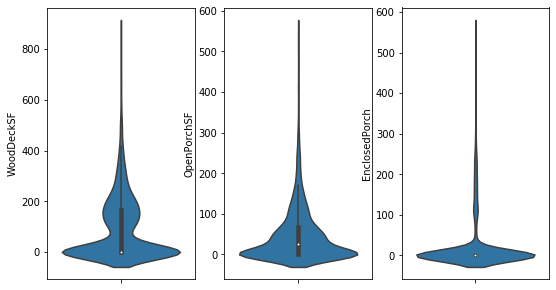

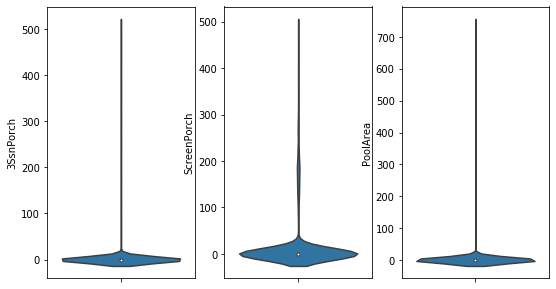

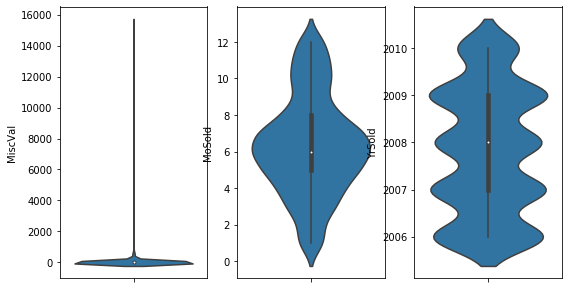

In [19]:
# Make the violin plots to check the distribution of every column
# Violin plots are just like box plots, but it tells you more about density which box plots do not.
# Here, you can see the multimodal distribution of the data

ncol = 3
nrow = 12
for i in range(nrow):
    fg,ax=plt.subplots(nrows=1,ncols=ncol,figsize=(9,5))
    for j in range(ncol):
        sns.violinplot(y = numeric_data.iloc[:,(i*ncol+j)],ax=ax[j])

In [20]:
# finding the best correlated features among all features,
# we are keeping the threshold 0.5 to limit the number of features
correlation = numeric_data.corr().abs()
correlation = pd.DataFrame(np.triu(correlation))
high_correlated = correlation.stack().sort_values(kind='quicksort')
high_correlated = high_correlated[(high_correlated >= 0.5)&(high_correlated<1)]
high_cor_column =  high_correlated.index.values

# Data viz using scatter plot

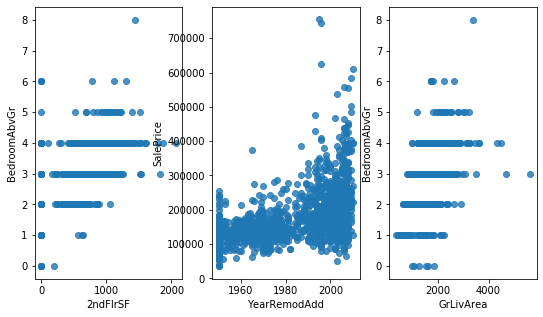

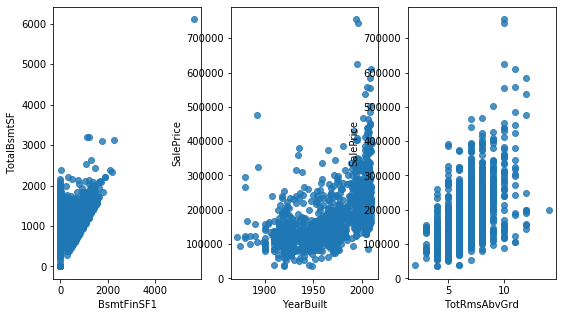

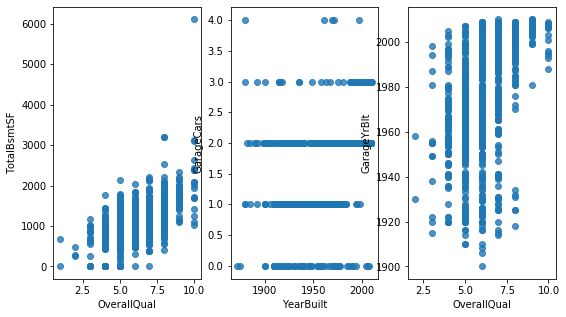

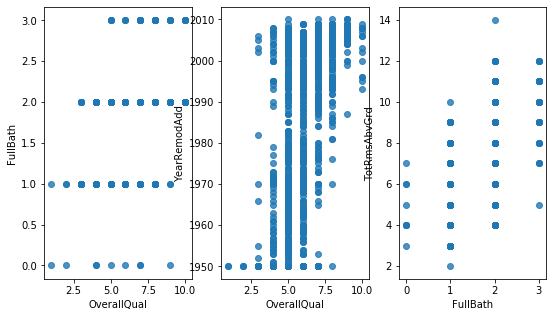

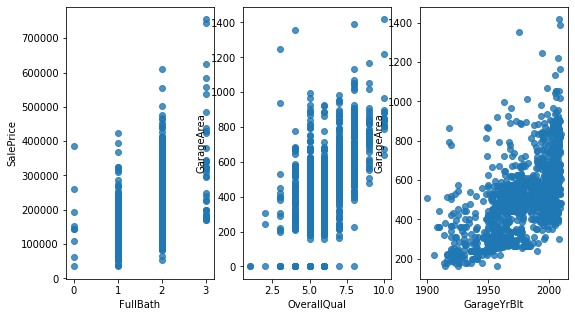

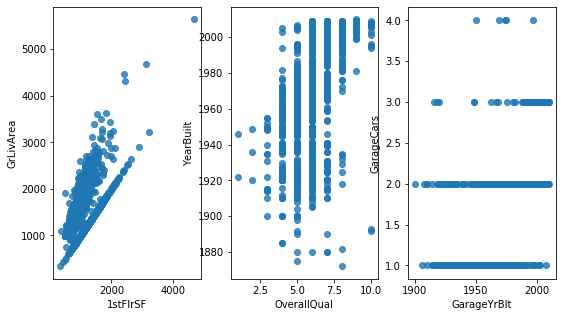

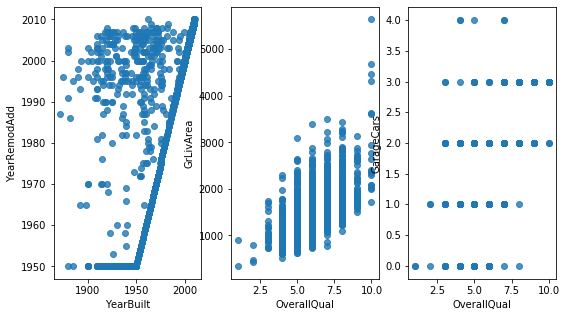

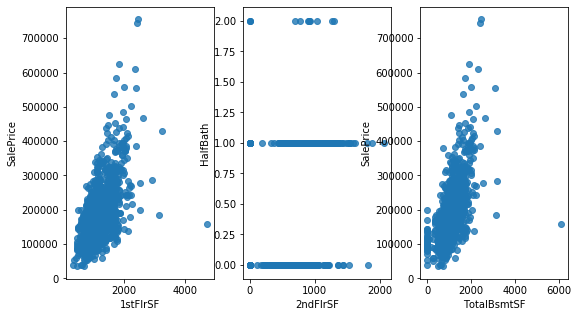

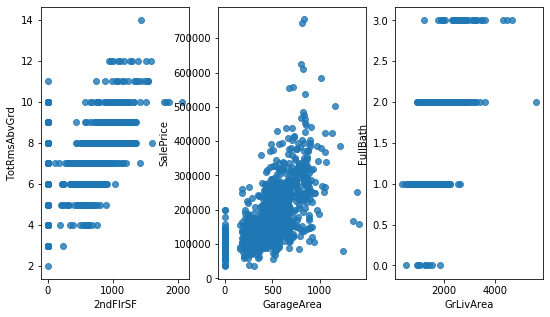

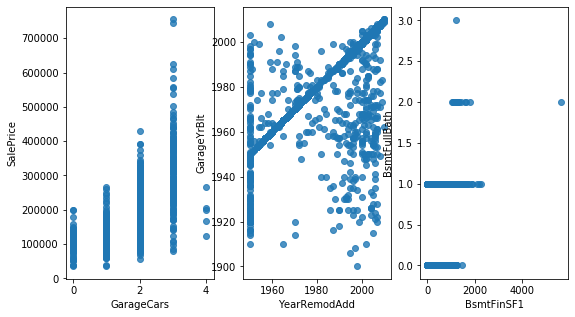

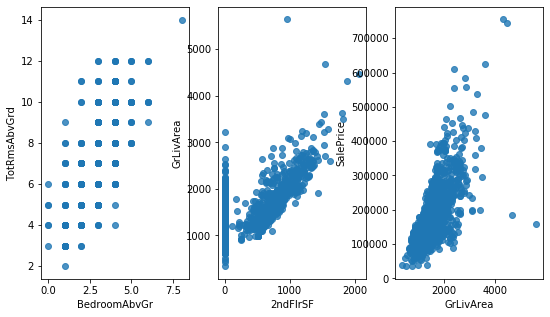

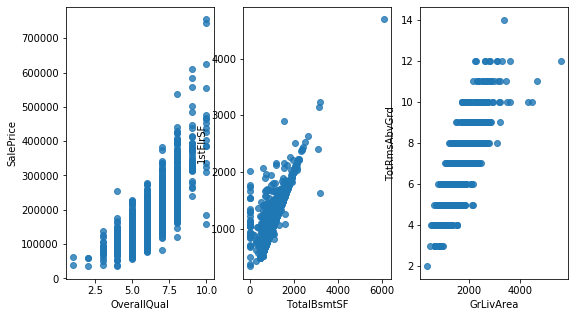

In [21]:
# Visualize scatter plot for top correlated features
x_col=[]
y_col =[]
for i in range(len(high_cor_column)):
    x_col.append(numeric_data.columns[high_cor_column[i][0]])
    y_col.append(numeric_data.columns[high_cor_column[i][1]])
for i in range(nrow):
    fg,ax=plt.subplots(nrows=1,ncols=ncol,figsize=(9,5))
    for j in range(ncol):
        sns.regplot(x=x_col[i*ncol+j],y=y_col[i*ncol+j],data=numeric_data,ax = ax[j],fit_reg=False)

In [22]:

# Make different data frame for the category data in train and test
cat_name = house_price.columns.difference(house_price.columns[numeric_feature])
cat_data = house_price.loc[:,cat_name]
cat_name_test = house_test.columns.difference(house_test.columns[numeric_fet_test])
cat_test = house_price.loc[:,cat_name_test]

# Viz of Categorical variable to identify if they are nomial or ordinal

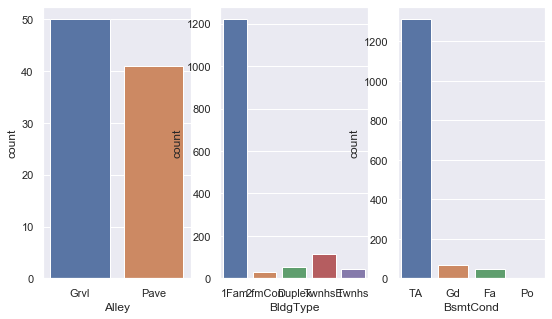

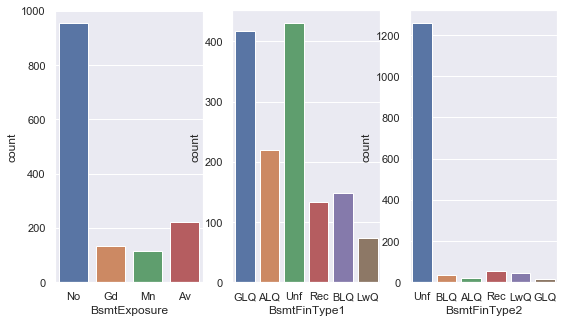

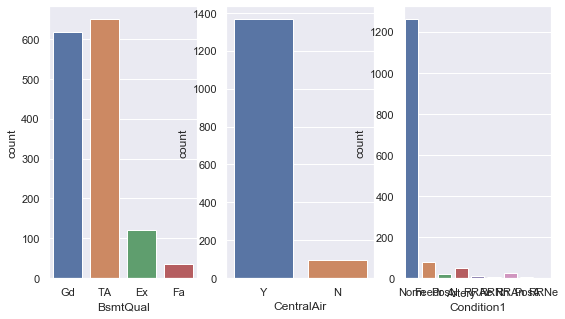

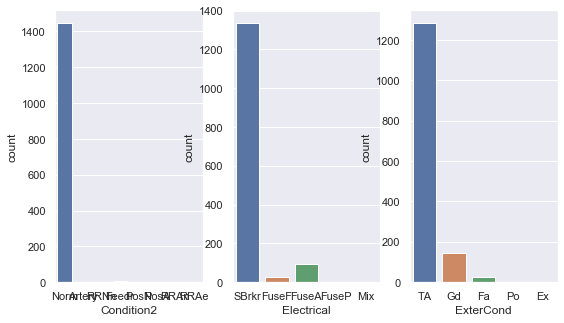

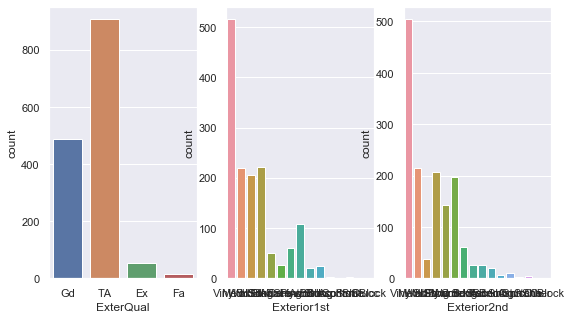

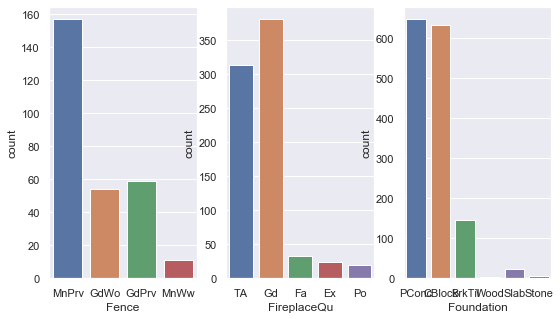

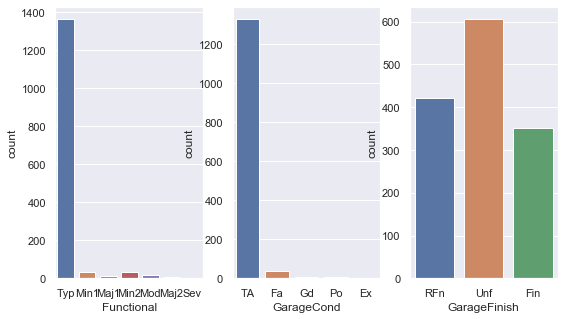

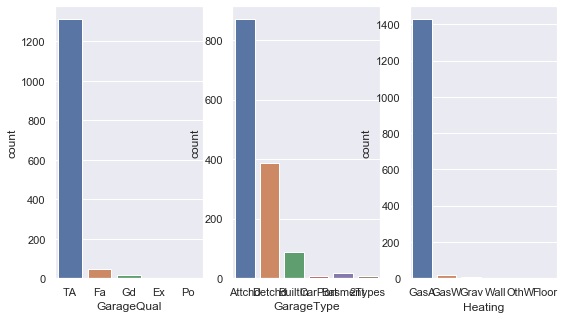

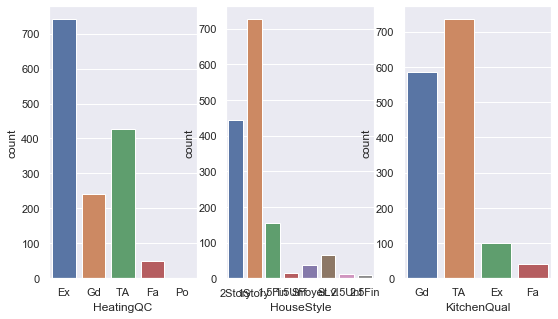

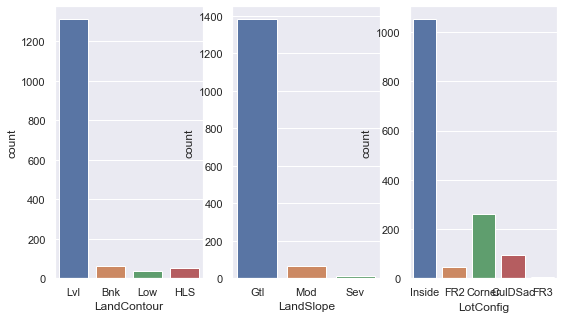

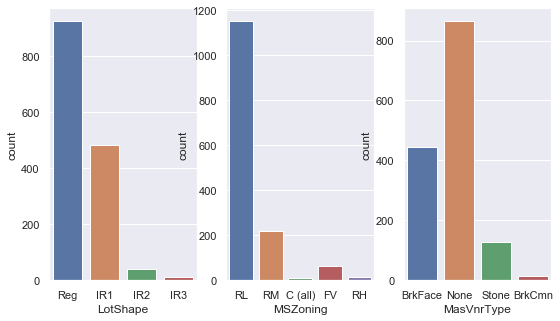

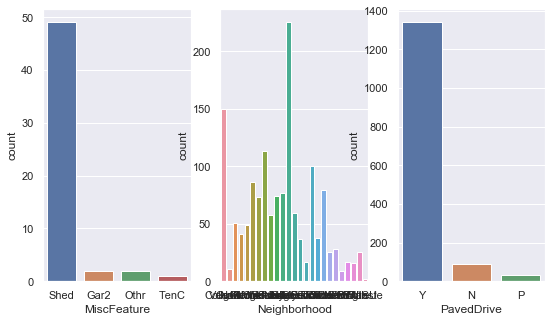

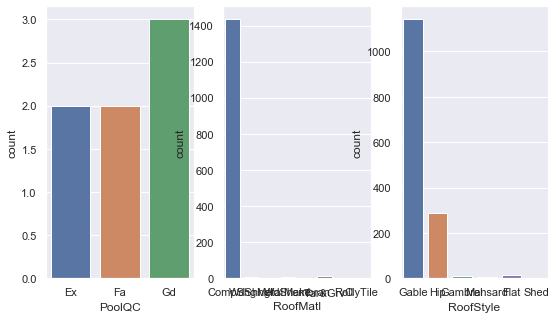

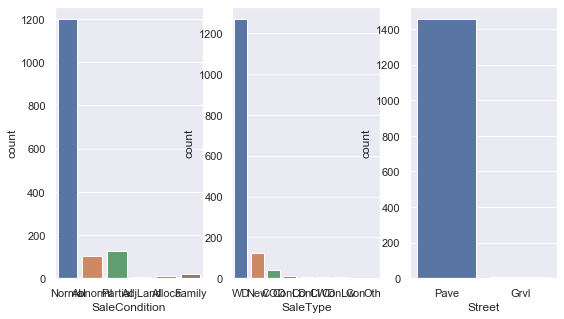

In [23]:
# Visualize Distribution of categorical data

sns.set(rc={'figure.figsize':(40,40)})
n_col =3
n_row = 14
for i in range(n_row):
    fg,ax = plt.subplots(nrows=1,ncols=n_col,figsize=(9,5))
    for j in range(n_col):
        sns.countplot(x =cat_data.iloc[:, (i*n_col + j)],ax=ax[j])

In [24]:

#Now we can make out even better that out of 81 columns only the above columns have null values 
#and you can see the percentage of the data that is missing

totalMissing = house_price.isnull().sum().sort_values(ascending = False)
percMissing = (house_price.isnull().sum() / house_price.isnull().count().sort_values(ascending = False)) * 100
missing = pd.concat([totalMissing, percMissing], axis = 1, keys = ['total', '% data missing'])
missing = missing[missing['total'] > 0]
missing

,total,% data missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [29]:
house_price11 = pd.read_csv("train.csv") 
numeric_types = house_price11.dtypes[house_price11.dtypes != "object"].index
house_price11[numeric_types].corr()['SalePrice'][:]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

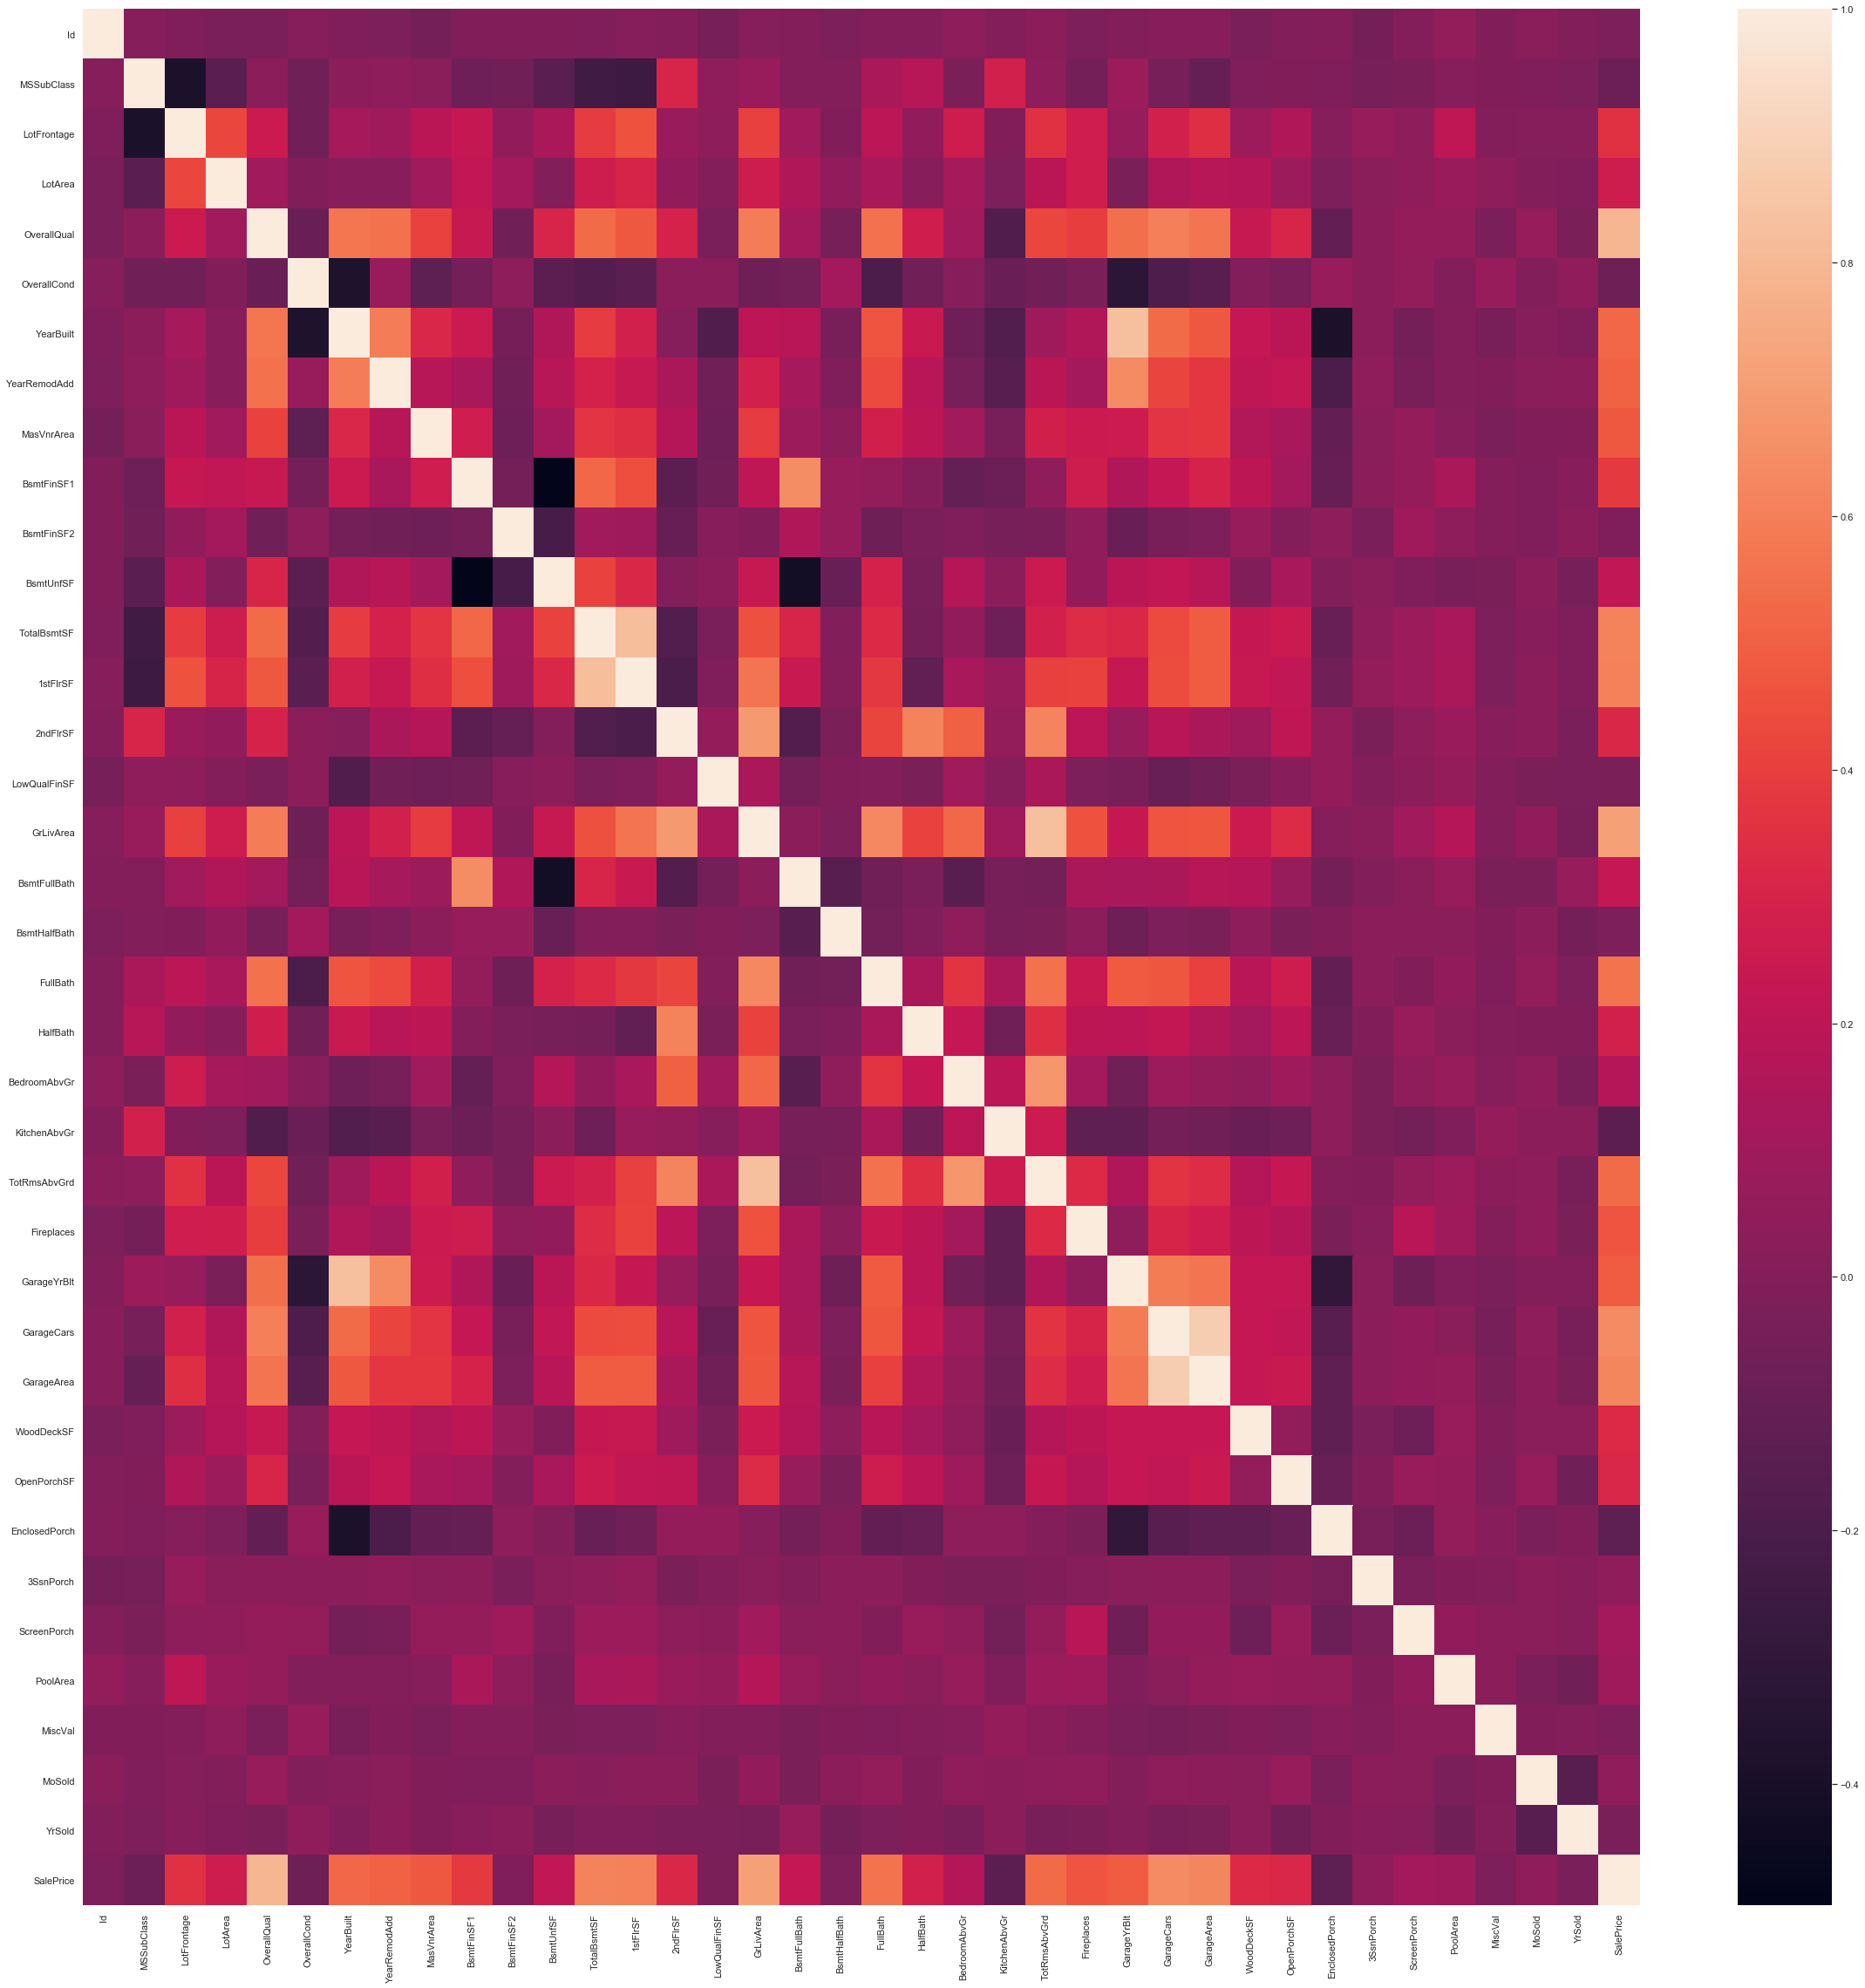

In [30]:
corr = house_price11.corr()
sns.heatmap(corr)

Text(0, 0.5, 'SalePrice')

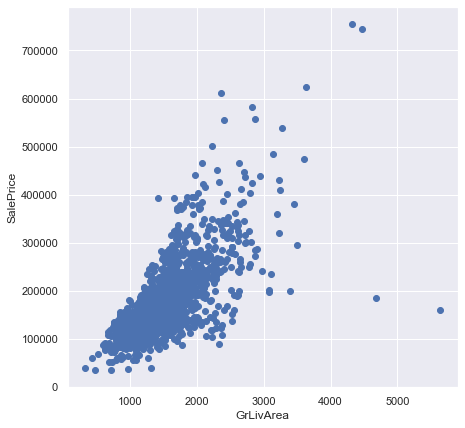

In [32]:
import matplotlib.pyplot as plot
fig = plot.figure(figsize=(7,7))
plot.scatter(x=house_price11['GrLivArea'], y=house_price11['SalePrice'])
plot.xlabel("GrLivArea")
plot.ylabel("SalePrice")

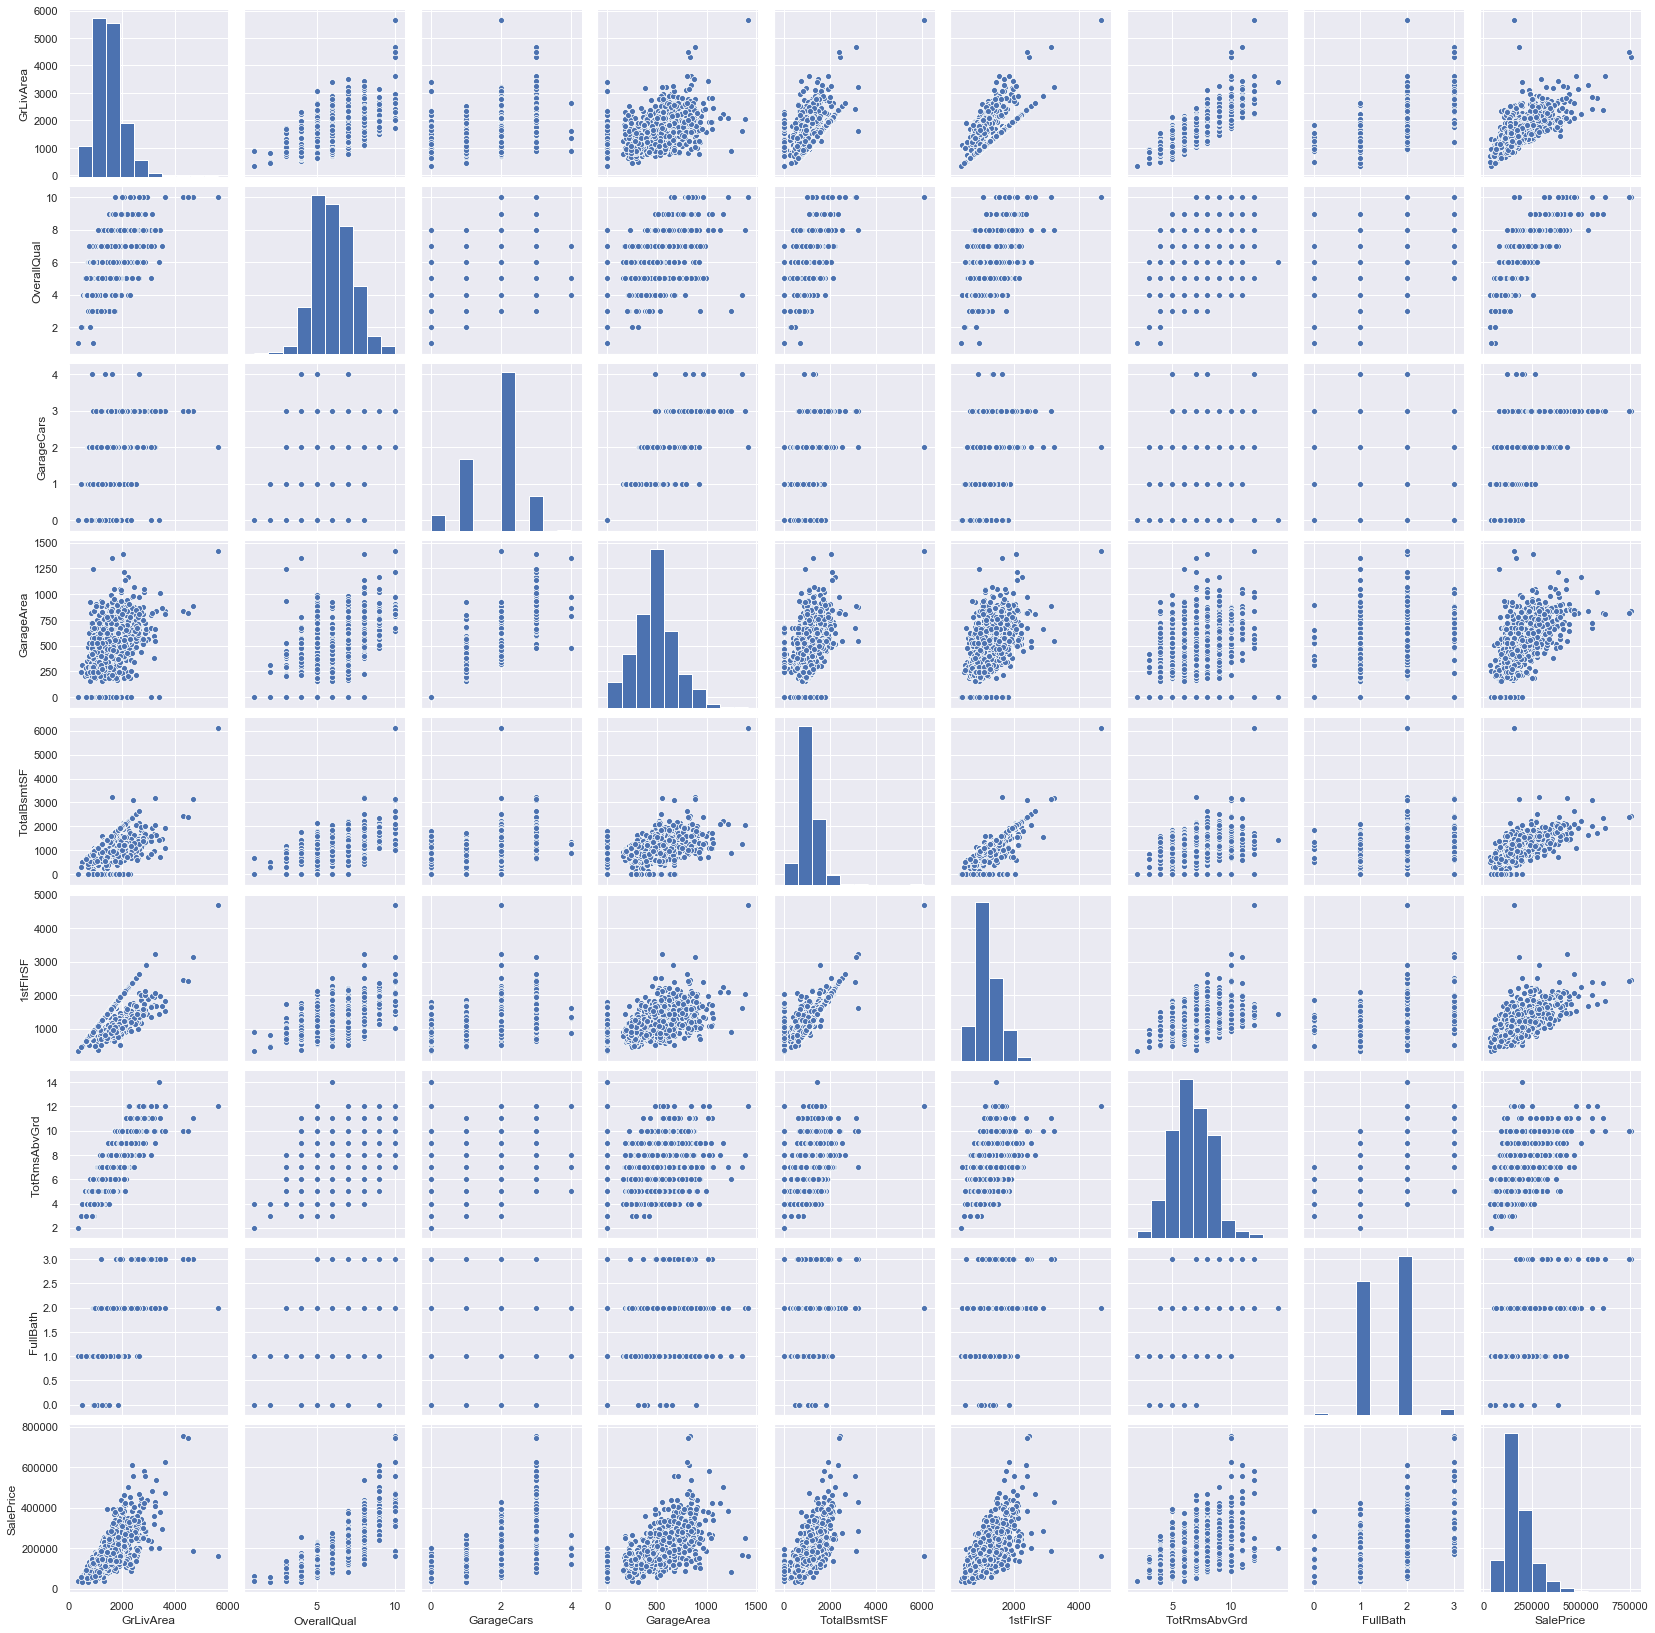

In [33]:
sns.pairplot(house_price11[['GrLivArea','OverallQual','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','FullBath','SalePrice']], kind="scatter")
plot.show()


In [36]:
row_name = house_price11.GrLivArea[house_price11.GrLivArea > 4000].index
house_price11.drop(house_price11.index[row_name],inplace=True)


Text(0, 0.5, 'SalePrice')

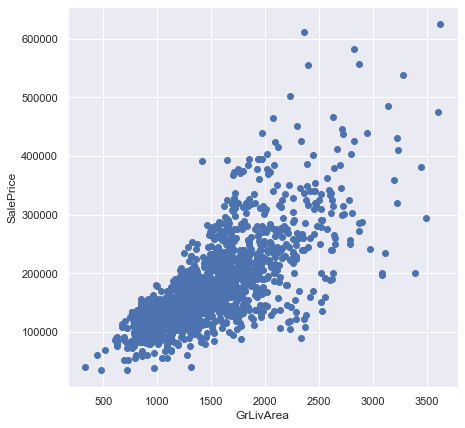

In [37]:
fig = plot.figure(figsize=(7,7))
plot.scatter(x=house_price11['GrLivArea'], y=house_price11['SalePrice'])
plot.xlabel("GrLivArea")
plot.ylabel("SalePrice")

In [39]:
house_price11.skew()

Id                0.001342
MSSubClass        1.406366
LotFrontage       1.536435
LotArea          12.587561
OverallQual       0.183871
OverallCond       0.690631
YearBuilt        -0.610087
YearRemodAdd     -0.499831
MasVnrArea        2.648987
BsmtFinSF1        0.744855
BsmtFinSF2        4.248587
BsmtUnfSF         0.921759
TotalBsmtSF       0.486395
1stFlrSF          0.867081
2ndFlrSF          0.777866
LowQualFinSF      8.998564
GrLivArea         0.835192
BsmtFullBath      0.591152
BsmtHalfBath      4.128967
FullBath          0.017694
HalfBath          0.684223
BedroomAbvGr      0.215067
KitchenAbvGr      4.481366
TotRmsAbvGrd      0.661416
Fireplaces        0.632678
GarageYrBlt      -0.645821
GarageCars       -0.343475
GarageArea        0.132991
WoodDeckSF        1.551271
OpenPorchSF       2.339846
EnclosedPorch     3.084454
3SsnPorch        10.289866
ScreenPorch       4.115641
PoolArea         17.522613
MiscVal          24.443364
MoSold            0.217883
YrSold            0.093214
S

In [40]:
numeric_types = house_price11.dtypes[house_price11.dtypes != "object"].index
skewd = house_price11[numeric_types].columns[house_price11[numeric_types].skew() > 0.75]
data_log = house_price11[skewd].apply(np.log1p,1)
house_price11[skewd] = data_log
house_price11[numeric_types] = house_price11[numeric_types].fillna(house_price11[numeric_types].median())

In [41]:
house_price11.skew()

Id                0.001342
MSSubClass        0.252130
LotFrontage      -0.987033
LotArea          -0.180382
OverallQual       0.183871
OverallCond       0.690631
YearBuilt        -0.610087
YearRemodAdd     -0.499831
MasVnrArea        0.506128
BsmtFinSF1        0.744855
BsmtFinSF2        2.518748
BsmtUnfSF        -2.182650
TotalBsmtSF       0.486395
1stFlrSF         -0.004520
2ndFlrSF          0.295677
LowQualFinSF      7.449565
GrLivArea        -0.113799
BsmtFullBath      0.591152
BsmtHalfBath      3.956185
FullBath          0.017694
HalfBath          0.684223
BedroomAbvGr      0.215067
KitchenAbvGr      3.863121
TotRmsAbvGrd      0.661416
Fireplaces        0.632678
GarageYrBlt      -0.675158
GarageCars       -0.343475
GarageArea        0.132991
WoodDeckSF        0.159343
OpenPorchSF      -0.020274
EnclosedPorch     2.107656
3SsnPorch         7.723866
ScreenPorch       3.144867
PoolArea         17.006205
MiscVal           5.162852
MoSold            0.217883
YrSold            0.093214
S